In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('preprocessed_data1.csv')
data

,location_region,location_state,device_manufacturer,os_name,spend_total,spend_vas,spend_voice,spend_data,sms_cost,xtra_data_talk_rev,customer_class,customer_value,gender,age,device_type,event_type
0,North West,others,infinix,android,2671.0800,0.0,1911.440000,1050.000,68.00,0.0,44.0,3,M,26.0,Smartphone,1
1,South East,others,tecno,android,5094.3770,220.0,598.400000,0.000,24.00,500.0,49.0,3,M,33.0,Smartphone,1
2,unspecified,unspecified,tecno,android,7135.5865,0.0,0.000000,0.000,0.00,0.0,44.0,4,M,27.0,Smartphone,1
3,South West,lagos,others,android,100.0000,0.0,828.833339,0.000,0.00,0.0,49.0,1,M,53.0,Smartphone,1
4,unspecified,unspecified,tecno,android,202.4500,60.0,89.800000,0.000,0.00,0.0,44.0,1,M,51.0,Smartphone,1
5,North Central,others,others,android,9341.4600,1975.0,5729.590000,1000.000,80.00,0.0,46.0,4,M,39.0,Smartphone,1
6,South East,others,tecno,android,5094.3770,220.0,598.400000,0.000,24.00,500.0,49.0,3,M,33.0,Smartphone,1
7,North West,kano,others,android,3786.7200,0.0,869.050000,0.000,60.00,0.0,44.0,3,M,28.0,Smartphone,1
8,South West,ogun,itel,android,3515.1100,0.0,1613.460000,0.000,20.00,0.0,46.0,3,M,40.0,Smartphone,0
9,North West,others,others,others,589.6800,0.0,3957.640000,60.000,160.00,0.0,44.0,2,M,28.0,Smartphone,0


### Splitting the Dataset into training and test sets

###### Splitting the dataset into dependent and independent variable


In [4]:
X = data
y = data.loc[:,'event_type']

### Preprocessing the Data for model fitting

Before the dataset is trained or fitted with a machine learning model, it necessarily undergoes some vital transformations. These transformation have a huge effect on the performance of the learning model. Transformation for numeric and categorical variables. They include:

Data Rescaling
Standardization
Normalization
Binarization
Encoding Categorical Variables

###### Data rescaling
Different scales for units of observations in the same dataset can have an adverse effect for certain machine learning models, especially when minimizing the cost function of the algorithm, because it will shrink the function space and makes it difficult for an optimization algorithm like gradient descent to find the global minimum. Hence the raeson for rescaling:

In [7]:
from sklearn.preprocessing import MinMaxScaler

M = X.iloc[:,[4,6,10,11,13]]

# rescale X
scaler = MinMaxScaler(feature_range=(0, 1))
X.iloc[:,[4,6,10,11,13]] = scaler.fit_transform(M)

###### Normalization
Since some of the numerical varaibles are sparsed (i.e., a large number of the observations are zeros) and also have differing scales. It is then useful to normalize the variables.

In [8]:
from sklearn.preprocessing import Normalizer

# normalize N
N = X.iloc[:,[5,7,8,9]]

scaler = Normalizer().fit(N)
X.iloc[:,[5,7,8,9]] = scaler.transform(N)

In [9]:
X

,location_region,location_state,device_manufacturer,os_name,spend_total,spend_vas,spend_voice,spend_data,sms_cost,xtra_data_talk_rev,customer_class,customer_value,gender,age,device_type,event_type
0,North West,others,infinix,android,0.001311,0.000000,0.027413,0.997910,0.064627,0.000000,0.023278,0.6,M,0.168539,Smartphone,1
1,South East,others,tecno,android,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,M,0.247191,Smartphone,1
2,unspecified,unspecified,tecno,android,0.003502,0.000000,0.000000,0.000000,0.000000,0.000000,0.023278,0.8,M,0.179775,Smartphone,1
3,South West,lagos,others,android,0.000049,0.000000,0.011887,0.000000,0.000000,0.000000,0.028128,0.2,M,0.471910,Smartphone,1
4,unspecified,unspecified,tecno,android,0.000099,1.000000,0.001288,0.000000,0.000000,0.000000,0.023278,0.2,M,0.449438,Smartphone,1
5,North Central,others,others,android,0.004585,0.891575,0.082170,0.451430,0.036114,0.000000,0.025218,0.8,M,0.314607,Smartphone,1
6,South East,others,tecno,android,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,M,0.247191,Smartphone,1
7,North West,kano,others,android,0.001858,0.000000,0.012463,0.000000,1.000000,0.000000,0.023278,0.6,M,0.191011,Smartphone,1
8,South West,ogun,itel,android,0.001725,0.000000,0.023139,0.000000,1.000000,0.000000,0.025218,0.6,M,0.325843,Smartphone,0
9,North West,others,others,others,0.000289,0.000000,0.056758,0.351123,0.936329,0.000000,0.023278,0.4,M,0.191011,Smartphone,0


### Encoding Categorical Variables
Most machine learing algorithms do not compute with non-numerical or categorical variables. Hence, encoding categorical variables is the technique for converting non-numerical features with labels into a numerical representation for use in machine learning modeling.

In [ ]:
# encode y
#y = data.loc[:,'event_type']
#label_encodery = LabelEncoder()
#data.loc[:,'event_type'] = label_encodery.fit_transform(y)

In [10]:
# import packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#### Label Encoding
is typically used on the target variable to transform a vector of hashable categories (or labels) into an integer representation

In [11]:
cols = ['location_region','location_state','device_manufacturer', 'os_name','gender','device_type']

for w in cols:
    L = X.loc[:,w]

    # label encode categorical features
    label_encoder = LabelEncoder()
    X.loc[:,w] = label_encoder.fit_transform(L)
    # print label encoding
    

In [12]:
X

,location_region,location_state,device_manufacturer,os_name,spend_total,spend_vas,spend_voice,spend_data,sms_cost,xtra_data_talk_rev,customer_class,customer_value,gender,age,device_type,event_type
0,2,4,1,0,0.001311,0.000000,0.027413,0.997910,0.064627,0.000000,0.023278,0.6,1,0.168539,1,1
1,3,4,6,0,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,1,0.247191,1,1
2,6,6,6,0,0.003502,0.000000,0.000000,0.000000,0.000000,0.000000,0.023278,0.8,1,0.179775,1,1
3,5,2,4,0,0.000049,0.000000,0.011887,0.000000,0.000000,0.000000,0.028128,0.2,1,0.471910,1,1
4,6,6,6,0,0.000099,1.000000,0.001288,0.000000,0.000000,0.000000,0.023278,0.2,1,0.449438,1,1
5,0,4,4,0,0.004585,0.891575,0.082170,0.451430,0.036114,0.000000,0.025218,0.8,1,0.314607,1,1
6,3,4,6,0,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,1,0.247191,1,1
7,2,1,4,0,0.001858,0.000000,0.012463,0.000000,1.000000,0.000000,0.023278,0.6,1,0.191011,1,1
8,5,3,2,0,0.001725,0.000000,0.023139,0.000000,1.000000,0.000000,0.025218,0.6,1,0.325843,1,0
9,2,4,4,1,0.000289,0.000000,0.056758,0.351123,0.936329,0.000000,0.023278,0.4,1,0.191011,1,0


##### OneHot encoder()

In [13]:
# Location_region
one_hot_encoder0 = OneHotEncoder()
encode_categorical0 = X.iloc[:,0].values.reshape(len(X.iloc[:,0]), 1)
one_hot_encode_X0 = one_hot_encoder0.fit_transform(encode_categorical0)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X0.todense()
k0 =one_hot_encode_X0.todense()
df0 = pd.DataFrame(data = k0, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('location_region', axis=1)
X = pd.concat([X,df0], axis=1)

In [14]:
# Location_state
one_hot_encoder0a = OneHotEncoder()
encode_categorical0a = X.iloc[:,0].values.reshape(len(X.iloc[:,0]), 1)
one_hot_encode_X0a = one_hot_encoder0a.fit_transform(encode_categorical0a)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X0a.todense()
k0a =one_hot_encode_X0a.todense()
df0a = pd.DataFrame(data = k0a, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('location_state', axis=1)
X = pd.concat([X,df0a], axis=1)

In [15]:
# Manufacturer device
one_hot_encoder01 = OneHotEncoder()
encode_categorical01 = X.iloc[:,0].values.reshape(len(X.iloc[:,0]), 1)
one_hot_encode_X01 = one_hot_encoder0.fit_transform(encode_categorical01)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X01.todense()
k01 =one_hot_encode_X01.todense()
df01 = pd.DataFrame(data = k01, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('device_manufacturer', axis=1)
X = pd.concat([X,df01], axis=1)

In [16]:
# os_name encoding
one_hot_encoder1 = OneHotEncoder()
encode_categorical1 = X.iloc[:,0].values.reshape(len(X.iloc[:,0]), 1)
one_hot_encode_X1 = one_hot_encoder1.fit_transform(encode_categorical1)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X1.todense()
k1 =one_hot_encode_X1.todense()
df1 = pd.DataFrame(data = k1, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('os_name', axis=1)
X = pd.concat([X,df1], axis=1)

In [17]:
# gender encoding
one_hot_encoder10 = OneHotEncoder()
encode_categorical10 = X.iloc[:,8].values.reshape(len(X.iloc[:,8]), 1)
one_hot_encode_X10= one_hot_encoder10.fit_transform(encode_categorical10)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X10.todense()
k10 =one_hot_encode_X10.todense()
df10 = pd.DataFrame(data = k10, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('gender', axis=1)
X = pd.concat([X,df10], axis=1)

In [18]:
# device_type encoding
one_hot_encoder12 = OneHotEncoder()
encode_categorical12 = X.iloc[:,9].values.reshape(len(X.iloc[:,9]), 1)
one_hot_encode_X12= one_hot_encoder12.fit_transform(encode_categorical12)

    # print one_hot encoded matrix - use todense() to print sparse matrix
    # or convert to array with toarray()
one_hot_encode_X12.todense()
k12 =one_hot_encode_X12.todense()
df12 = pd.DataFrame(data = k12, columns=None)

# Drop the categorical column and add the encoded columns
X = X.drop('device_type', axis=1)
X = pd.concat([X,df12], axis=1)

In [19]:
X

,spend_total,spend_vas,spend_voice,spend_data,sms_cost,xtra_data_talk_rev,customer_class,customer_value,age,event_type,...,6,0,1,2,0,1,2,0,1,2
0,0.001311,0.000000,0.027413,0.997910,0.064627,0.000000,0.023278,0.6,0.168539,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,0.247191,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.003502,0.000000,0.000000,0.000000,0.000000,0.000000,0.023278,0.8,0.179775,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000049,0.000000,0.011887,0.000000,0.000000,0.000000,0.028128,0.2,0.471910,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000099,1.000000,0.001288,0.000000,0.000000,0.000000,0.023278,0.2,0.449438,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.004585,0.891575,0.082170,0.451430,0.036114,0.000000,0.025218,0.8,0.314607,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,0.247191,1,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.001858,0.000000,0.012463,0.000000,1.000000,0.000000,0.023278,0.6,0.191011,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.001725,0.000000,0.023139,0.000000,1.000000,0.000000,0.025218,0.6,0.325843,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.000289,0.000000,0.056758,0.351123,0.936329,0.000000,0.023278,0.4,0.191011,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [20]:
X.columns

Index([       'spend_total',          'spend_vas',        'spend_voice',
               'spend_data',           'sms_cost', 'xtra_data_talk_rev',
           'customer_class',     'customer_value',                'age',
               'event_type',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    0,
                          1,                    2,                    3,
                          4,                    5,                    6,
                          0,                    1,                    2,
                          3,                    4,                    5,
                          6,                    0,                    1,
                          2,                    0,                    1,
                          2,                    0,                    1,
                          2],
      dtype='object')

In [21]:
X.to_csv (r'preproccessed_data2.csv', index = False, header=True)

In [22]:
data = pd.read_csv('preproccessed_data2.csv')
data

,spend_total,spend_vas,spend_voice,spend_data,sms_cost,xtra_data_talk_rev,customer_class,customer_value,age,lr_nc,...,os_android,os_unspec,os_proprietory,gender_f,gender_m,gender_unspec,dt_featurephone,dt_smartphone,dt_unspec,event_type
0,0.001311,0.000000,0.027413,0.997910,0.064627,0.000000,0.023278,0.6,0.168539,0,...,1,0,0,0,1,0,0,1,0,1
1,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,0.247191,0,...,1,0,0,0,1,0,0,1,0,1
2,0.003502,0.000000,0.000000,0.000000,0.000000,0.000000,0.023278,0.8,0.179775,0,...,1,0,0,0,1,0,0,1,0,1
3,0.000049,0.000000,0.011887,0.000000,0.000000,0.000000,0.028128,0.2,0.471910,0,...,1,0,0,0,1,0,0,1,0,1
4,0.000099,1.000000,0.001288,0.000000,0.000000,0.000000,0.023278,0.2,0.449438,0,...,1,0,0,0,1,0,0,1,0,1
5,0.004585,0.891575,0.082170,0.451430,0.036114,0.000000,0.025218,0.8,0.314607,1,...,1,0,0,0,1,0,0,1,0,1
6,0.002500,0.402350,0.008582,0.000000,0.043893,0.914433,0.028128,0.6,0.247191,0,...,1,0,0,0,1,0,0,1,0,1
7,0.001858,0.000000,0.012463,0.000000,1.000000,0.000000,0.023278,0.6,0.191011,0,...,1,0,0,0,1,0,0,1,0,1
8,0.001725,0.000000,0.023139,0.000000,1.000000,0.000000,0.025218,0.6,0.325843,0,...,1,0,0,0,1,0,0,1,0,0
9,0.000289,0.000000,0.056758,0.351123,0.936329,0.000000,0.023278,0.4,0.191011,0,...,0,1,0,0,1,0,0,1,0,0


In [23]:
data.columns

Index(['spend_total', 'spend_vas', 'spend_voice', 'spend_data', 'sms_cost',
       'xtra_data_talk_rev', 'customer_class', 'customer_value', 'age',
       'lr_nc', 'lr_ne', 'lr_nw', 'lr_se', 'lr_ss', 'lr_sw', 'lr_unspec',
       'fct', 'kano', 'lagos', 'ogun', 'other_states', 'rivers',
       'unspec_state', 'dm_apple', 'dm_infinix', 'dm_itel', 'dm_nokia',
       'dm_others', 'dm_samsung', 'dm_techno', 'os_android', 'os_unspec',
       'os_proprietory', 'gender_f', 'gender_m', 'gender_unspec',
       'dt_featurephone', 'dt_smartphone', 'dt_unspec', 'event_type'],
      dtype='object')

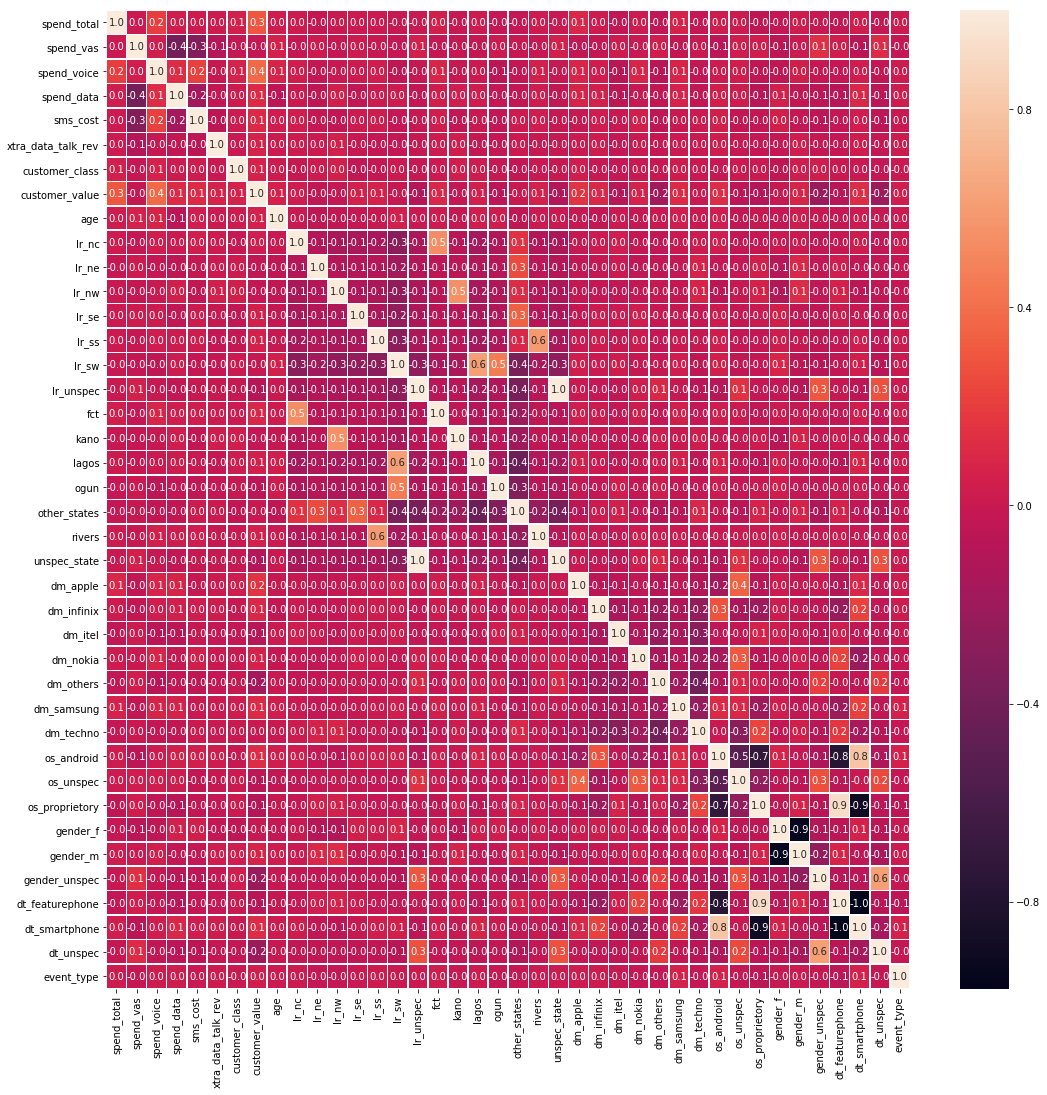

In [26]:
X = data
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [24]:
list = ['event_type','os_android', 'os_unspecified','os_proprietory']
X = data.drop(list,axis = 1 )
y = data.loc[:,'event_type']